In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

from string import ascii_uppercase
import itertools


AIDE QUI M'A PERMIS DE COMPRENDE DJIKSTRA : https://youtu.be/W9kh_Dto9G4

https://www.lyceum.fr/tg/nsi/5-algorithmique/3-algorithmes-sur-les-graphes/#parcourir-un-graphe


In [2]:
df = pd.read_csv('../datas/timetables.csv', sep='\t')

In [3]:
# Créer une liste de caracteres : A, B... ABD
def iter_all_strings():
    for size in itertools.count(1):
        for s in itertools.product(ascii_uppercase, repeat=size):
            yield "".join(s)

In [4]:
gares_iterator = iter_all_strings() 

In [5]:
for s in iter_all_strings():
    print(s)
    if s == 'BB':
        break

A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z
AA
AB
AC
AD
AE
AF
AG
AH
AI
AJ
AK
AL
AM
AN
AO
AP
AQ
AR
AS
AT
AU
AV
AW
AX
AY
AZ
BA
BB


In [6]:
# on affecte à chaque gare une lettre ou un groupe de lettres pour faciliter la tache
gares = {}
with open('../datas/timetables.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    next(reader) # on saute la 1ere ligne : trip_id	trajet	duree

    for row in reader:
        trip_id, trajet, duree = row # ['OCESN003100F140147152', 'Gare de Le Havre - Gare de Paris-St-Lazare', '138']
        gares_split = trajet.split(' - ') # ['Gare de Le Havre', 'Gare de Paris-St-Lazare']

        if len(gares_split) == 2:
            gare_origine, gare_destination = gares_split
            
            if gare_origine not in gares:
                gares[gare_origine] = next(gares_iterator)

            if gare_destination not in gares:
                gares[gare_destination] = next(gares_iterator)

In [7]:
gares # si premier gare != 'A' alors redemarrer le kernel et relancer ou relancer à partir de gares_iterator = iter_all_strings()  

{'Gare de Le Havre': 'A',
 'Gare de Paris-St-Lazare': 'B',
 'Gare de Dieppe': 'C',
 'Gare de Rouen-Rive-Droite': 'D',
 'Gare de Cherbourg': 'E',
 'Gare de Caen': 'F',
 'Gare de Trouville-Deauville': 'G',
 'Gare de Granville': 'H',
 'Gare de Paris-Montp.3-Vaug.': 'I',
 'Gare de Paris-Montparnasse 1-2': 'J',
 'Gare de Dreux': 'K',
 'Gare de Bourges': 'L',
 'Gare de Paris-Austerlitz': 'M',
 'Gare de Vierzon': 'N',
 'Gare de Paris-Bercy': 'O',
 'Gare de Nevers': 'P',
 'Gare de Paris-Gare-de-Lyon': 'Q',
 'Gare de Argentan': 'R',
 'Gare de OrlÃ©ans': 'S',
 'Gare de Tours': 'T',
 'Gare de Aubrais-(les)': 'U',
 'Gare de St-Pierre-des-Corps': 'V',
 'Gare de Calais Ville': 'W',
 'Gare de Paris Gare du Nord': 'X',
 'Gare de Boulogne Ville': 'Y',
 'Gare de Amiens': 'Z',
 'Gare de Cambrai Ville': 'AA',
 'Gare de Maubeuge': 'AB',
 'Gare de St Quentin': 'AC',
 'Gare de CompiÃ¨gne': 'AD',
 'Gare de Le Mans': 'AE',
 'Gare de Nogent-le-Rotrou': 'AF',
 'Gare de Chartres': 'AG',
 'Gare de Blois-Chambord':

In [8]:
# afin de créer un dict de ce type : g = {'B': [('G', 13), ('H', 12)],
#     'C': [('D', 8), ('F', 11), ('G', 7), ('H', 20)], avec point de départ, tajets et poids

#on prends le nom de la gare de départ, on affecte sa lettre et on regroupe ensuite ses lettres de destination avec la durée.
graphe = {}
with open('../datas/timetables.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    next(reader)  # Sauter la première ligne
    
    for row in reader:
        trip_id, trajet, duree = row
        gares_split = trajet.split(' - ')
        
        if len(gares_split) == 2:
            gare_origine, gare_destination = gares_split
            lettre_origine = gares[gare_origine]
            lettre_destination = gares[gare_destination]
            duree = int(duree)
        
        if lettre_origine not in graphe:
            graphe[lettre_origine] = [] #de base impossible mais bon
            

        # if lettre_destination not in graphe:
        #     graphe[lettre_destination] = [] # ceux qui ne sont jamais pris en tant que départ

        graphe[lettre_origine].append((lettre_destination, duree)) 


In [9]:
graphe # il y a tout 

{'A': [('B', 138), ('ABR', 15), ('ABS', 26), ('D', 61)],
 'C': [('B', 145), ('D', 63), ('D', '52')],
 'B': [('D', 97), ('G', 147), ('ABP', 60), ('ABV', 105)],
 'E': [('B', 194)],
 'F': [('B', 149),
  ('AE', 111),
  ('T', 182),
  ('D', 100),
  ('D', '50'),
  ('OI', 170),
  ('E', 174),
  ('E', '84'),
  ('OE', 33),
  ('NU', 75),
  ('ABX', 51),
  ('IC', 167),
  ('H', 103)],
 'H': [('I', 201), ('J', 195), ('NV', 84), ('NX', 75), ('OI', 110)],
 'K': [('H', 142), ('OD', 79)],
 'L': [('M', 122),
  ('O', 131),
  ('P', 38),
  ('GD', 65),
  ('SQ', 71),
  ('N', 70),
  ('FL', 160),
  ('T', 110),
  ('XC', 121),
  ('S', 73)],
 'M': [('N', 101), ('T', 131), ('V', 118), ('SG', 139)],
 'P': [('M', 177),
  ('O', 154),
  ('Q', 146),
  ('HK', 33),
  ('XL', 13),
  ('T', 146),
  ('S', 132),
  ('N', 69),
  ('HD', 124)],
 'R': [('I', 121), ('K', 69), ('NY', 53), ('H', 83), ('F', 40)],
 'S': [('M', 75), ('T', 72), ('O', 84), ('V', 58), ('N', 51)],
 'U': [('M', 71), ('SL', 135), ('YF', 45), ('T', 160), ('YH', 45

In [10]:
nouveau_graphe = {}
for lettre_origine, destinations in graphe.items():
    nouveau_graphe[lettre_origine] = {}
    for destination, duree in destinations:
        nouveau_graphe[lettre_origine][destination] = duree


In [11]:
nouveau_graphe

{'A': {'B': 138, 'ABR': 15, 'ABS': 26, 'D': 61},
 'C': {'B': 145, 'D': '52'},
 'B': {'D': 97, 'G': 147, 'ABP': 60, 'ABV': 105},
 'E': {'B': 194},
 'F': {'B': 149,
  'AE': 111,
  'T': 182,
  'D': '50',
  'OI': 170,
  'E': '84',
  'OE': 33,
  'NU': 75,
  'ABX': 51,
  'IC': 167,
  'H': 103},
 'H': {'I': 201, 'J': 195, 'NV': 84, 'NX': 75, 'OI': 110},
 'K': {'H': 142, 'OD': 79},
 'L': {'M': 122,
  'O': 131,
  'P': 38,
  'GD': 65,
  'SQ': 71,
  'N': 70,
  'FL': 160,
  'T': 110,
  'XC': 121,
  'S': 73},
 'M': {'N': 101, 'T': 131, 'V': 118, 'SG': 139},
 'P': {'M': 177,
  'O': 154,
  'Q': 146,
  'HK': 33,
  'XL': 13,
  'T': 146,
  'S': 132,
  'N': 69,
  'HD': 124},
 'R': {'I': 121, 'K': 69, 'NY': 53, 'H': 83, 'F': 40},
 'S': {'M': 75, 'T': 72, 'O': 84, 'V': 58, 'N': 51},
 'U': {'M': 71, 'SL': 135, 'YF': 45, 'T': 160, 'YH': 45},
 'O': {'T': 146, 'SG': 149},
 'W': {'X': 183,
  'NR': 109,
  'ZU': 68,
  'ABJ': 62,
  'ABL': 49,
  'AAA': 50,
  'CC': 75},
 'Y': {'X': 145, 'W': 28, 'NT': 30, 'ABL': 72}

AIDE POUR L'ALGO : https://mpegon.perso.math.cnrs.fr/documents/BCPST/TP06.pdf

 https://youtu.be/W9kh_Dto9G4

https://www.lyceum.fr/tg/nsi/5-algorithmique/3-algorithmes-sur-les-graphes/#parcourir-un-graphe

In [12]:
import networkx as nx

In [13]:
# Créez un nouveau graphe dirigé
G = nx.DiGraph()

In [14]:
# Ajoutez les nœuds et les arêtes à partir de votre dictionnaire
for node, edges in graphe.items():
    for edge, weight in edges:
        G.add_edge(node, edge, weight=weight)

In [15]:
G.nodes

NodeView(('A', 'B', 'ABR', 'ABS', 'D', 'C', 'G', 'ABP', 'ABV', 'E', 'F', 'AE', 'T', 'OI', 'OE', 'NU', 'ABX', 'IC', 'H', 'I', 'J', 'NV', 'NX', 'K', 'OD', 'L', 'M', 'O', 'P', 'GD', 'SQ', 'N', 'FL', 'XC', 'S', 'V', 'SG', 'Q', 'HK', 'XL', 'HD', 'R', 'NY', 'U', 'SL', 'YF', 'YH', 'W', 'X', 'NR', 'ZU', 'ABJ', 'ABL', 'AAA', 'CC', 'Y', 'NT', 'Z', 'NP', 'NQ', 'OZ', 'AC', 'AAH', 'OW', 'AD', 'YO', 'AA', 'ZW', 'AB', 'CD', 'AAG', 'OY', 'AF', 'OQ', 'AAD', 'AG', 'YI', 'YJ', 'SC', 'ACQ', 'AH', 'UA', 'AI', 'HL', 'BC', 'AQ', 'ADY', 'QF', 'AEA', 'AEB', 'RK', 'PN', 'AEC', 'JL', 'AJ', 'AK', 'MS', 'AL', 'AM', 'AN', 'AO', 'AP', 'AR', 'PL', 'AV', 'AS', 'ADP', 'AT', 'AAQ', 'AAX', 'AAY', 'VQ', 'VR', 'AAU', 'VG', 'AU', 'VE', 'AAR', 'AZ', 'ADW', 'RL', 'AW', 'PJ', 'CS', 'BW', 'BY', 'CP', 'CQ', 'QJ', 'QZ', 'BU', 'RM', 'RN', 'QB', 'AX', 'AY', 'CO', 'CM', 'CL', 'RQ', 'CR', 'VP', 'ADK', 'JW', 'VO', 'YT', 'ADL', 'ADM', 'ADN', 'BB', 'BA', 'QQ', 'IZ', 'XH', 'HQ', 'XJ', 'IR', 'LJ', 'KN', 'ABF', 'JG', 'IM', 'FZ', 'CI', 'CH'

In [16]:
dg = nx.to_dict_of_lists(G)


In [17]:
import networkx as nx
from collections import deque


def plus_court_chemin(G, s, d):
    # dictionnaire des prédecesseurs
    predecesseurs = {s: None}
    # Créer une file
    f = deque()
    # Enfiler le sommet de départ
    f.appendleft(s)
    # Liste des sommets visités
    visites = [s]
    
    # TANT QUE la file est non vide
    while f:
        # On récupère le noeud
        s = f.pop()
        # POUR TOUT voisin t de s dans G
        for t in G[s]:
            if t == d:
                # Destination trouvée, on remonte le chemin
                ville = s
                chemin = [d]
                while ville:
                    chemin.append(ville)
                    ville = predecesseurs[ville]
                # On remet dans l'ordre
                chemin.reverse()
                return chemin
            # SI t non marqué
            elif t not in visites:
                # Enfiler t
                f.appendleft(t)
                # Marquer t
                visites.append(t)
                # Mise à jour du dictionnaire des prédecesseurs
                predecesseurs[t] = s
    # Destination non trouvée
    return []

In [18]:
print("On teste sur tous les trajets possibles")
print("---------------------------------------")
villes = G.nodes
from itertools import combinations

for source, dest in combinations(villes, 2):
    chemin = plus_court_chemin(dg, source, dest)
    print(f"{source} -> {dest}: {chemin}")

On teste sur tous les trajets possibles
---------------------------------------
A -> B: ['A', 'B']
A -> ABR: ['A', 'ABR']
A -> ABS: ['A', 'ABS']
A -> D: ['A', 'D']
A -> C: []
A -> G: ['A', 'B', 'G']
A -> ABP: ['A', 'B', 'ABP']
A -> ABV: ['A', 'B', 'ABV']
A -> E: []
A -> F: []
A -> AE: []
A -> T: []
A -> OI: []
A -> OE: []
A -> NU: []
A -> ABX: []
A -> IC: []
A -> H: []
A -> I: []
A -> J: []
A -> NV: []
A -> NX: []
A -> K: []
A -> OD: []
A -> L: []
A -> M: []
A -> O: []
A -> P: []
A -> GD: []
A -> SQ: []
A -> N: []
A -> FL: []
A -> XC: []
A -> S: []
A -> V: []
A -> SG: []
A -> Q: []
A -> HK: []
A -> XL: []
A -> HD: []
A -> R: []
A -> NY: []
A -> U: []
A -> SL: []
A -> YF: []
A -> YH: []
A -> W: []
A -> X: []
A -> NR: []
A -> ZU: []
A -> ABJ: []
A -> ABL: []
A -> AAA: []
A -> CC: []
A -> Y: []
A -> NT: []
A -> Z: []
A -> NP: []
A -> NQ: []
A -> OZ: []
A -> AC: []
A -> AAH: []
A -> OW: []
A -> AD: []
A -> YO: []
A -> AA: []
A -> ZW: []
A -> AB: []
A -> CD: []
A -> AAG: []
A -> OY: []
A ->

In [25]:
print("\nSi la destination n'est pas trouvée")
print("-----------------------------------")
source, dest = "YS", "O"
chemin = plus_court_chemin(dg, source, dest)
print(f"{source} -> {dest}: {chemin}")


Si la destination n'est pas trouvée
-----------------------------------
YS -> O: ['YS', 'BA', 'O']



Pour vérification: Forme du graphe
------------------------------------


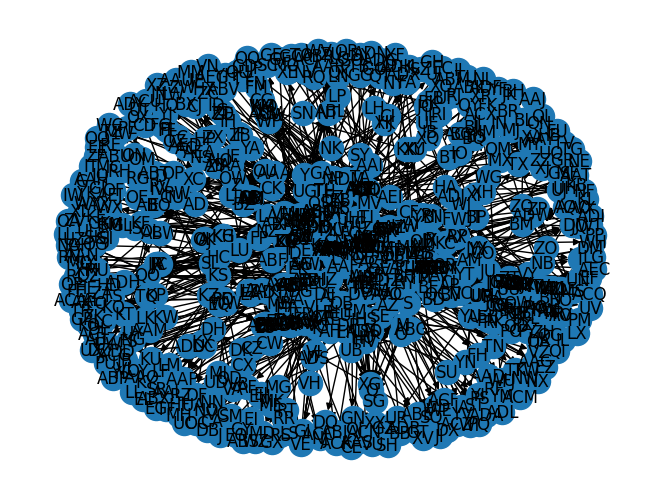

In [20]:
print("\nPour vérification: Forme du graphe")
print("------------------------------------")
nx.draw(G, with_labels=True, pos=nx.spring_layout(G))